In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import my_module as my

#### Lecture des données

In [2]:

geo = pd.read_csv('olist_geolocation_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
category = pd.read_csv('product_category_name_translation.csv')

# 1. Analyse exploratoire  
Dans cette partie, nous allons parcourir les datasets, un par un, et analyser leurs données afin de mieux les comprendre.    

## 1.1. Geolocalisation  
Ce jeu de données contient des informations sur les codes postaux brésiliens et leurs coordonnées latitude/longitude. Utile pour tracer des cartes et trouver des distances entre les vendeurs et les clients.  


In [3]:
#aperçu des données
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
#description des données
geo.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [5]:
my.variable_survey(geo)

,variable name,variable type,nbr of distinct values,percentage of NaNs
0,geolocation_zip_code_prefix,int64,19015,0.0 %
1,geolocation_lat,float64,717360,0.0 %
2,geolocation_lng,float64,717613,0.0 %
3,geolocation_city,object,8011,0.0 %
4,geolocation_state,object,27,0.0 %


In [6]:
geo_dict = {'geo': geo}
my.dataframe_survey(geo_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,geo,"(1000163,5)",0,0.0 %,261831,0.2617883285024541 %


### Remarque:  
Nous remarquons qu'il y a des doublons dans ce dataset. Nous allons les supprimer

In [11]:
geo = geo.drop_duplicates()

In [12]:
geo.shape

(738332, 5)

In [14]:
geo_dict = {'geo': geo}
my.dataframe_survey(geo_dict)

,dataframe,"(rows, column)",Total number of nans,percentage of nans,number of duplicated rows,percentage of duplicated rows
0,geo,"(738332,5)",0,0.0 %,0,0.0 %


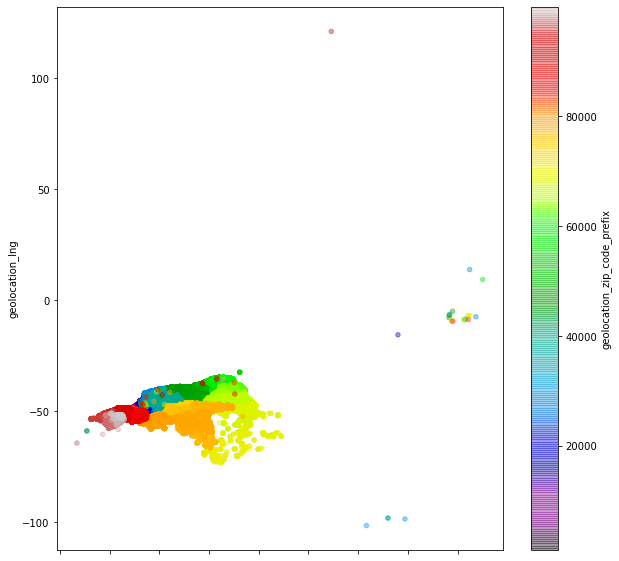

In [15]:
geo.plot(kind="scatter", x="geolocation_lat", y="geolocation_lng",
         alpha=0.4, c="geolocation_zip_code_prefix",
         cmap='nipy_spectral', colorbar=True, figsize=(10, 10))
plt.show()

### Remarque:  
Nous remarquons d'après la représentation géographique des zip-codes la présence des valeurs aberrantes. Nous allons les supprimer. 

In [16]:
geo = geo[geo['geolocation_lat'].between(-35 , 5)]
geo = geo[geo['geolocation_lng'].between(-75 , -33)]

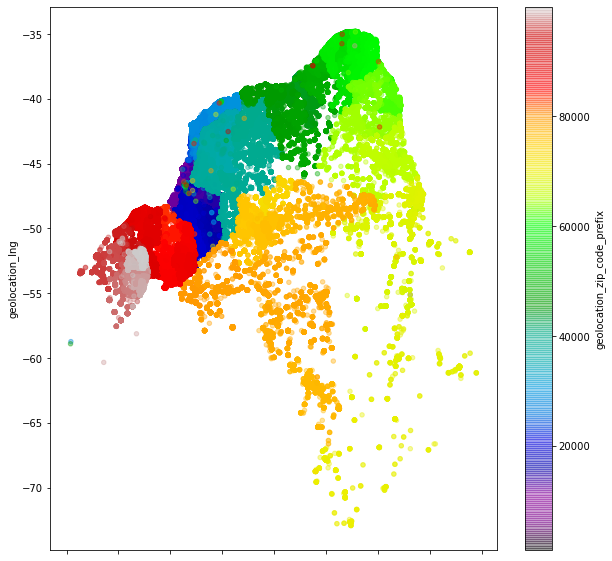

In [17]:
geo.plot(kind="scatter", x="geolocation_lat", y="geolocation_lng",
         alpha=0.4, c="geolocation_zip_code_prefix",
         cmap='nipy_spectral', colorbar=True, figsize=(10, 10))
plt.show()

## 1.2. Orders / Payement

In [ ]:
orders .head()